# Assignment 1
#### leyu,lin(Jack) 817372912

[![](https://img.shields.io/badge/Finished-100%25-green)]() [![]( https://img.shields.io/badge/Python-v3.7-orange)]()
[![](https://img.shields.io/badge/pandas-v1-blue)]()
   

### File Paths

In [1]:
TRUMPTWEETS = 'trumptweets.csv'
USWEATHER = 'US_WeatherEvents_2016-2019.csv'

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime

### Definition,Declaration

In [3]:
#define font size
font_size = 18

# define graph size and dpi
def set_dpi_size(): 
    plt.figure(dpi=150, figsize=(6, 4)) 
    sns.set(style='darkgrid',)
    
# define equla function use for compare start and end year
def euqal(s,e):
    if s == e:
        return 0
    else: 
        return 1

### Reading the dataset

In [4]:
df_usweather = pd.read_csv(USWEATHER)
df_trumptweets = pd.read_csv(TRUMPTWEETS)

### Weather Data
***

### 1. How many snow events were recorded?

In [5]:
# for later use
df_severity = df_usweather['Severity'] 
df_type = df_usweather['Type']
df_snow = df_type[df_type.eq("Snow")]

# count by Type which equal to Snow
print('Snow Event Records:',df_snow.count(), 'times')

Snow Event Records: 679472 times


### 2. How many moderate snow events were recorded each year? Produce a table and line plot
2016-2017 snow will counts twice. 1 for 2016 1 for 2017 I did following steps:
* I extract start time and end time to year
* Filter subtract result if there is a gap, count gaps make new columns
* Groupby start year and add new columns result

In [6]:
# Select 'moderate snow' columns
df_msnow = df_usweather[df_type.eq("Snow") & df_severity.eq("Moderate")]

# convert to datetime for extraing year
dt_start = pd.to_datetime(df_msnow['StartTime(UTC)'])
dt_end = pd.to_datetime(df_msnow['EndTime(UTC)'])
# slect start year and end year check if there is a gap mark as 1 else 0
df_diff_year = df_msnow.apply(lambda x: euqal(x['StartTime(UTC)'][:4],x['EndTime(UTC)'][:4]),axis = 1)

# Select gap columns count them
df_diff_msnow = df_diff_year[df_diff_year >0].groupby(dt_end.dt.year).size()
df_start_msnow = df_msnow.groupby(dt_start.dt.year).size()

# combine two colums and add gap to start year get results
df_count_msnow = pd.concat([df_start_msnow,df_diff_msnow],ignore_index=True,axis =1).fillna(0)
df_msnow_year= (df_count_msnow.loc[:,1]+df_count_msnow.loc[:,0])\
                                                      .astype(int)\
                                                      .reset_index(name='NumSnow')\
                                                      .rename(columns={'index':'Year'})
df_msnow_year

,Year,NumSnow
0,2016,16900
1,2017,15780
2,2018,18686
3,2019,22290


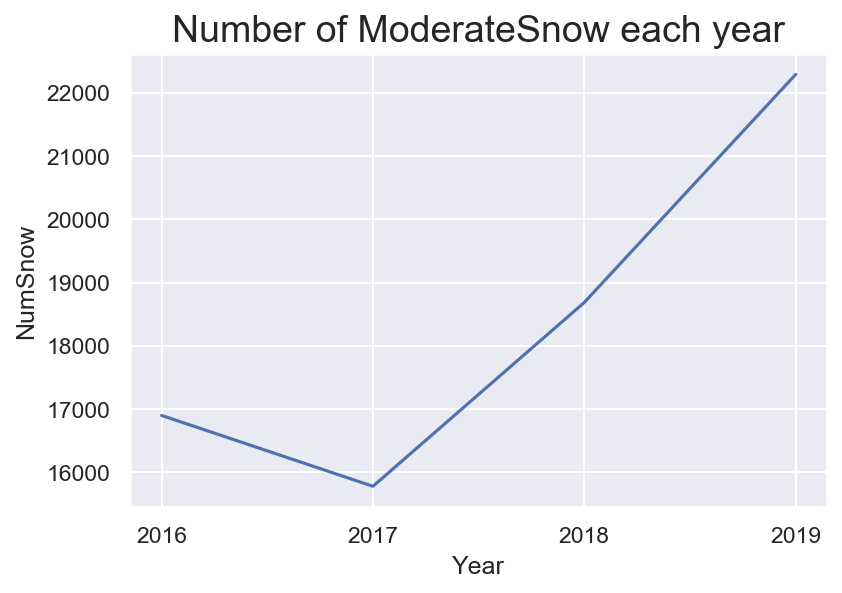

In [7]:
# line plot
set_dpi_size()
# hue label if need
ax = sns.lineplot(x='Year', y='NumSnow', data=df_msnow_year)
plt.gca().set_xticks(df_msnow_year["Year"].unique())
plt.title('Number of ModerateSnow each year',fontsize=font_size)

#convert float to int show the years
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

### 3. How many snow events were recorded in each state?

In [8]:
# Select state and check type which equal to 'Snow'
df_events_state = df_usweather[df_type.eq("Snow")]\
                  .groupby(df_usweather['State']).size()\
                  .reset_index(name = "NumSnow")  
df_events_state

,State,NumSnow
0,AL,701
1,AR,1461
2,AZ,4973
3,CA,8727
4,CO,38218
5,CT,3200
6,DE,663
7,FL,69
8,GA,1021
9,IA,26408


### 4. How many snow events were recorded each hour?
* Extract start hour calculate time gap between start and end
* Split gap into each hour add them to start hour to make a final chart
* Groupby the final hour chart

In [9]:
# Select columns which type is Snow
df_snow = df_usweather[df_usweather['Type'].eq('Snow')]

# Convert to datetime for extracting later
df_end_date = pd.to_datetime(df_snow['EndTime(UTC)'])
df_start_date = pd.to_datetime(df_snow['StartTime(UTC)'])

# Calculate the time between start and end in terms of seconds
# divide by 3600 get hour
df_timestamp = ((df_end_date-df_start_date).dt.total_seconds()/3600).astype(int).reset_index(name='hours')

# Get start hour snow counts
df_start_snow = df_snow.groupby(df_start_date.dt.hour).size()
df_diff_snow = df_timestamp[df_timestamp > 24].groupby(df_end_date.dt.hour).size()

# combine two colums and add gap to start hour get
df_hour_snow = pd.concat([df_start_snow,df_diff_snow],ignore_index=True,axis =1).fillna(0)
df_hour_count = (df_hour_snow.loc[:,1]+df_hour_snow.loc[:,0])\
                                                   .astype(int)\
                                                   .reset_index(name='NumSnow')\
                                                   .rename(columns={'index':'Hour'})

df_hour_count

,Hour,NumSnow
0,0.0,30024
1,1.0,29988
2,2.0,30067
3,3.0,30242
4,4.0,31009
5,5.0,31064
6,6.0,31865
7,7.0,31624
8,8.0,32367
9,9.0,32878


### 5. How many events of each severity did San Diego have? Produce a table and bar plot

In [10]:
# select city which equal 'San Diego' counts by different 'Severity'
df_city = df_usweather['City']
df_sd_events= df_usweather[df_city.eq('San Diego')]\
        .groupby(df_severity).size()\
        .reset_index(name='NumEvents')
df_sd_events

,Severity,NumEvents
0,Heavy,62
1,Light,2870
2,Moderate,1992
3,Other,3
4,Severe,1365
5,UNK,15


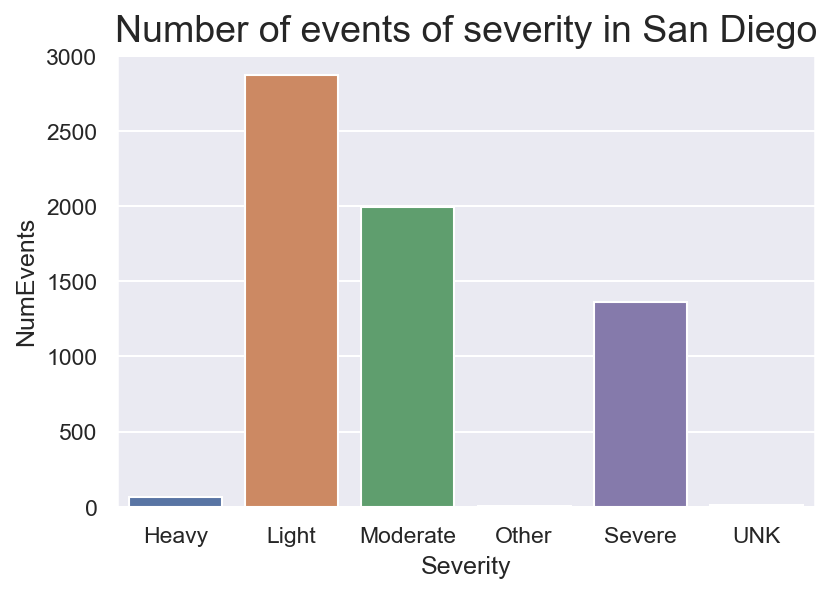

In [11]:
# bar plot
set_dpi_size()
sns.barplot( x='Severity', y='NumEvents',data=df_sd_events)
plt.title('Number of events of severity in San Diego',fontsize=font_size)
plt.show()

### Trump Tweets
***

### 1. How many tweets did the President make each year? Produce a table of results and plot the values.

In [12]:
#extract year and group by each year find out number of tweets
df_date_toyear = pd.DatetimeIndex(df_trumptweets['date']).year
df_tweets_year = df_trumptweets.groupby(df_date_toyear).size()\
                               .reset_index(name = "NumTweets")\
                               .rename(columns={'date': 'Year'})
df_tweets_year

,Year,NumTweets
0,2009,56
1,2010,143
2,2011,870
3,2012,4190
4,2013,8207
5,2014,5987
6,2015,7719
7,2016,3951
8,2017,2232
9,2018,2998


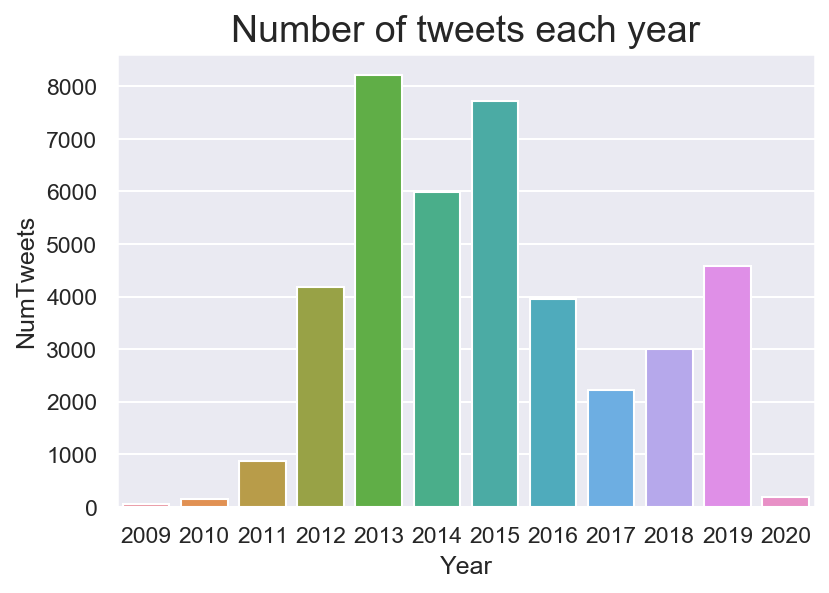

In [13]:
# bar plot
set_dpi_size()
sns.barplot(x='Year', y='NumTweets', data=df_tweets_year)
plt.title('Number of tweets each year',fontsize=font_size)
plt.show()

### 2. How many tweets contain "Fake News"?
I count and consider all case below:
* ignore the upper or lower case
* ignore space 
* count once for contains mutiple 'fake news'

In [14]:
print('Number of tweets with "Fake News" is:',
df_trumptweets['content'].str\
                         .contains('fake news|fakenews', case=False)\
                         .sum())

Number of tweets with "Fake News" is: 579


### 3. A tweet with the location could be considered a security issue as it would give the current location of the President. How many tweets contain a location?

In [15]:
#check geo which indictae location
print('Number tweets has location: ',df_trumptweets['geo'].count())

Number tweets has location:  0


### 4. How many tweets were done each hour? Produce a table and a plot.

In [16]:
#table
# select the hour row [11:13] which hours counts by hours 
df_tweets_hour= df_trumptweets['id'].groupby (df_trumptweets['date']\
                                    .map(lambda x: x[11:13]))\
                                    .count().reset_index(name = 'numTweets')\
                                    .rename(columns={'date': 'Hour'})
df_tweets_hour

,Hour,numTweets
0,00,1620
1,01,1522
2,02,1795
3,03,1974
4,04,2076
5,05,1258
6,06,831
7,07,400
8,08,347
9,09,321


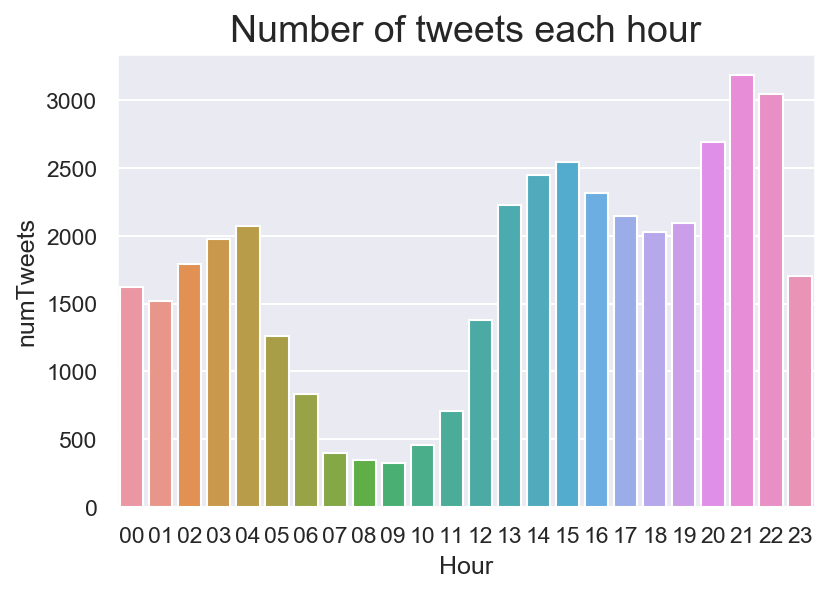

In [17]:
# bar plot
set_dpi_size()
sns.barplot(x='Hour', y='numTweets', data=df_tweets_hour)
plt.title('Number of tweets each hour',fontsize=font_size)
plt.show()